# Iris Dataset
https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/customization/custom_training_walkthrough.ipynb

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.9.2
Eager execution: True


The Iris classification problem
Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to classify flowers statistically. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest—we're going to classify Iris flowers based on the length and width measurements of their sepals and petals.
The Iris genus entails about 300 species, but our program will only classify the following three:
Iris setosa,
Iris virginica,
Iris versicolor,


Fortunately, someone has already created a dataset of 120 Iris flowers with the sepal and petal measurements. This is a classic dataset that is popular for beginner machine learning classification problems.

Download the dataset

Download the training dataset file using the tf.keras.utils.get_file function. This returns the file path of the downloaded file:

In [ ]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

2194/2194 [==============================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [ ]:
train_dataset_fp

'/root/.keras/datasets/iris_training.csv'

In [ ]:
!head -n5 {train_dataset_fp}
#The first line is a header containing information about the dataset: There are 120 total examples. Each example has four features and one of three possible label names.
#Subsequent rows are data records, one *example* per line, where: The first four fields are *features*: these are the characteristics of an example. Here, the fields hold float numbers representing flower measurements.
#The last column is the *label*: this is the value we want to predict. For this dataset, it's an integer value of 0, 1, or 2 that corresponds to a flower name.

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [ ]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


Each label is associated with string name (for example, "setosa"), but machine learning typically relies on numeric values. The label numbers are mapped to a named representation, such as:
0: Iris setosa
1: Iris versicolor
2: Iris virginica

In [ ]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

## Create a tf.data.Dataset

TensorFlow's Dataset API handles many common cases for loading data into a model. This is a high-level API for reading data and transforming it into a form used for training.
Since the dataset is a CSV-formatted text file, use the tf.data.experimental.make_csv_dataset function to parse the data into a suitable format. Since this function generates data for training models, the default behavior is to shuffle the data (shuffle=True, shuffle_buffer_size=10000), and repeat the dataset forever (num_epochs=None). We also set the batch_size parameter:

In [ ]:
batch_size = 32

#The make_csv_dataset function returns a tf.data.Dataset of (features, label) pairs, where features is a dictionary: {'feature_name': value}
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,#csv file path
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [ ]:
features, labels = next(iter(train_dataset))
print("Features:", features)
print("Labels:", labels)

Features: OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.5, 6.4, 6.1, 5.5, 5.9, 6.3, 5. , 6.3, 6. , 5.5, 4.7, 5.5, 6.4,
       6.8, 6.4, 5.8, 5.9, 7.2, 5.5, 6.4, 6. , 6. , 6.5, 6.3, 7.4, 5.4,
       6.1, 5.4, 6.5, 5. , 5.7, 4.9], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.3, 2.8, 2.6, 2.4, 3. , 3.3, 3.2, 2.3, 2.2, 2.4, 3.2, 3.5, 2.8,
       2.8, 3.2, 2.7, 3.2, 3.2, 2.6, 2.7, 3. , 2.9, 3. , 2.7, 2.8, 3.7,
       2.8, 3. , 2.8, 3.6, 4.4, 2.5], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.3, 5.6, 5.6, 3.8, 5.1, 6. , 1.2, 4.4, 5. , 3.7, 1.6, 1.3, 5.6,
       4.8, 5.3, 4.1, 4.8, 6. , 4.4, 5.3, 4.8, 4.5, 5.2, 4.9, 6.1, 1.5,
       4. , 4.5, 4.6, 1.4, 1.5, 4.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.3, 2.2, 1.4, 1.1, 1.8, 2.5, 0.2, 1.3, 1.5, 1. , 0.2, 0.2, 2.1,
       1.4, 2.3, 1. , 1.8, 1.8, 1.2, 1.9, 1.8, 1.5,

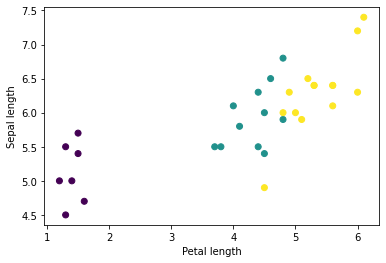

In [ ]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [ ]:
#To simplify the model building step, create a function to repackage the features dictionary into a single array with shape: (batch_size, num_features).
#This function uses the tf.stack method which takes values from a list of tensors and creates a combined tensor at the specified dimension:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [ ]:
#Then use the tf.data.Dataset#map method to pack the features of each (features,label) pair into the training dataset:
train_dataset = train_dataset.map(pack_features_vector)

In [ ]:
features, labels = next(iter(train_dataset))
print("Features:", features) #Features have been packed together
print("Labels:", labels)

Features: tf.Tensor(
[[7.3 2.9 6.3 1.8]
 [4.9 3.1 1.5 0.1]
 [6.7 3.  5.2 2.3]
 [5.5 2.4 3.7 1. ]
 [6.1 2.8 4.  1.3]
 [7.  3.2 4.7 1.4]
 [5.1 3.8 1.9 0.4]
 [6.6 2.9 4.6 1.3]
 [6.2 2.8 4.8 1.8]
 [6.4 3.2 4.5 1.5]
 [6.7 3.3 5.7 2.1]
 [6.9 3.1 4.9 1.5]
 [5.4 3.  4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.5 2.4 3.8 1.1]
 [6.2 3.4 5.4 2.3]
 [5.8 2.7 5.1 1.9]
 [7.2 3.  5.8 1.6]
 [5.  3.3 1.4 0.2]
 [6.7 3.  5.  1.7]
 [6.3 2.5 5.  1.9]
 [6.8 3.  5.5 2.1]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [6.7 3.1 5.6 2.4]
 [6.8 3.2 5.9 2.3]
 [6.3 2.7 4.9 1.8]
 [5.2 3.5 1.5 0.2]
 [5.1 3.8 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [6.  3.  4.8 1.8]
 [6.5 3.  5.8 2.2]], shape=(32, 4), dtype=float32)
Labels: tf.Tensor([2 0 2 1 1 1 0 1 2 1 2 1 1 2 1 2 2 2 0 1 2 2 0 1 2 2 2 0 0 2 2 2], shape=(32,), dtype=int32)


In [ ]:
#The features element of the Dataset are now arrays with shape (batch_size, num_features). Let's look at the first few examples:
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[7.7 2.8 6.7 2. ]
 [5.1 3.8 1.5 0.3]
 [5.6 2.7 4.2 1.3]
 [5.8 2.8 5.1 2.4]
 [6.  2.2 5.  1.5]], shape=(5, 4), dtype=float32)


##Create a model using Keras

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [ ]:
predictions = model(features)#input one batch of features
predictions[:5]#each example returns a logit for each class.

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-1.1075015,  2.9146588,  2.8211162],
       [-1.4697618,  1.3265725,  2.4220803],
       [-1.1197518,  1.9175291,  2.2785268],
       [-1.4108062,  1.6008711,  2.413423 ],
       [-0.8508687,  2.2192984,  2.1845677]], dtype=float32)>

In [ ]:
#To convert these logits to a probability for each class, use the softmax function:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.00928865, 0.51850724, 0.47220418],
       [0.01506352, 0.2468079 , 0.7381286 ],
       [0.01931955, 0.4027832 , 0.5778973 ],
       [0.01489892, 0.3027678 , 0.6823333 ],
       [0.02306509, 0.496949  , 0.4799859 ]], dtype=float32)>

In [ ]:
#Taking the tf.argmax across classes gives us the predicted class index. But, the model hasn't been trained yet, so these aren't good predictions:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [2 0 1 2 2 1 0 0 2 2 1 2 1 2 1 1 2 1 2 0 0 2 1 0 1 0 0 2 2 1 2 0]


## Create the model

Use tf.keras.losses.CategoricalCrossentropy: We expect labels to be provided in a one_hot representation
Use tf.keras.losses.SparseCategoricalCrossentropy: We expect labels to be provided as integers.

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
#Use this crossentropy loss function when there are two or more label classes.
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#Whether y_pred is expected to be a logits tensor. By default, we assume that y_pred encodes a probability distribution. Default from_logits=False,
#from_logits=True: Pushing the "softmax" activation into the cross-entropy loss layer significantly simplifies the loss computation and makes it more numerically stable.

In [ ]:
def loss(model, x, y, training):
  # training=True is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.6077046394348145


In [ ]:
#Use the tf.GradientTape context to calculate the *gradients* used to optimize your model:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
#calculate a single optimization step:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.6077046394348145
Step: 1,         Loss: 1.5461535453796387


## Training loop

In [ ]:
## Note: Rerunning this cell uses the same model variables
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

def train(flag):
  num_epochs = 201

  for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 32
    for x, y in train_dataset:
      # Optimize the model
      loss_value, grads = grad(model, x, y)
      optimizer.apply_gradients(zip(grads, model.trainable_variables))

      # Track progress
      epoch_loss_avg.update_state(loss_value)  # Add current batch loss
      # Compare predicted label to actual label
      # training=True is needed only if there are layers with different
      # behavior during training versus inference (e.g. Dropout).
      epoch_accuracy.update_state(y, model(x, training=True))

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if flag and epoch % 50 == 0:
      print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                  epoch_loss_avg.result(),
                                                                  epoch_accuracy.result()))

In [ ]:
def train_metrics():
  fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
  fig.suptitle('Training Metrics')

  axes[0].set_ylabel("Loss", fontsize=14)
  axes[0].plot(train_loss_results)

  axes[1].set_ylabel("Accuracy", fontsize=14)
  axes[1].set_xlabel("Epoch", fontsize=14)
  axes[1].plot(train_accuracy_results)
  plt.show()

## Get the test dataset

In [ ]:
def test(flag):
  test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

  test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                    origin=test_url)
  test_dataset = tf.data.experimental.make_csv_dataset(
      test_fp,
      batch_size,
      column_names=column_names,
      label_name='species',
      num_epochs=1,
      shuffle=False)

  test_dataset = test_dataset.map(pack_features_vector)
  #Evaluate the model on the test dataset
  test_accuracy = tf.keras.metrics.Accuracy()

  for (x, y) in test_dataset:
    # training=False is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    logits = model(x, training=False)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

  if flag:
    print("Test set accuracy: {:.3%}".format(test_accuracy.result()))
    print(prediction)
  tf.stack([y,prediction],axis=1)

In [ ]:
#Use the trained model to make predictions
def predict(flag):
  predict_dataset = tf.convert_to_tensor([
      [5.1, 3.3, 1.7, 0.5,],
      [5.9, 3.0, 4.2, 1.5,],
      [6.9, 3.1, 5.4, 2.1]
  ])

  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(predict_dataset, training=False)

  for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    if flag:
      print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

# Observe TensorFlow speedup on GPU relative to CPU

In [ ]:
def cpu(flag):
  with tf.device('/cpu:0'):
    if flag:
      print("Training...")
    train(flag)
    if flag:
      print("Training Metrics:")
      train_metrics()
      print("Testing...")
    test(flag)
    if flag:
      print("Prediction Results:")
    predict(flag)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def gpu(flag):
  with tf.device('/device:GPU:0'):
    if flag:
      print("Training...")
    train(flag)
    if flag:
      print("Training Metrics:")
      train_metrics()
      print("Testing...")
    test(flag)
    if flag:
      print("Prediction Results:")
    predict(flag)

RESULTS FOR CPU:

Training...
Epoch 000: Loss: 1.626, Accuracy: 40.833%
Epoch 050: Loss: 0.496, Accuracy: 86.667%
Epoch 100: Loss: 0.304, Accuracy: 96.667%
Epoch 150: Loss: 0.199, Accuracy: 96.667%
Epoch 200: Loss: 0.153, Accuracy: 97.500%
Training Metrics:


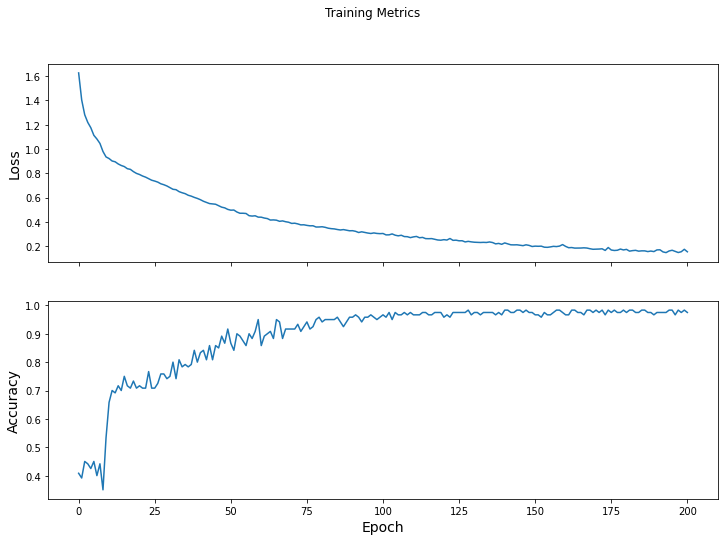

Testing...
573/573 [==============================] - 0s 0us/step
Test set accuracy: 93.333%
tf.Tensor([1 2 0 1 1 1 0 2 1 2 2 0 2 1 1 0 1 0 0 2 0 2 2 2 1 1 0 1 2 1], shape=(30,), dtype=int32)
Prediction Results:
Example 0 prediction: Iris setosa (97.1%)
Example 1 prediction: Iris versicolor (79.8%)
Example 2 prediction: Iris virginica (83.7%)


In [ ]:
print("RESULTS FOR CPU:\n")
cpu(True)

RESULTS FOR GPU:

Training...
Epoch 000: Loss: 0.150, Accuracy: 96.667%
Epoch 050: Loss: 0.146, Accuracy: 97.500%
Epoch 100: Loss: 0.100, Accuracy: 97.500%
Epoch 150: Loss: 0.114, Accuracy: 97.500%
Epoch 200: Loss: 0.087, Accuracy: 98.333%
Training Metrics:


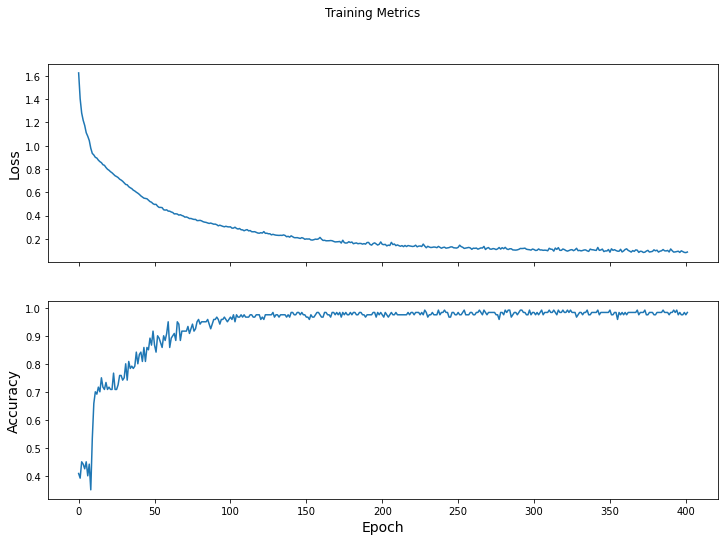

Testing...
Test set accuracy: 96.667%
tf.Tensor([1 2 0 1 1 1 0 1 1 2 2 0 2 1 1 0 1 0 0 2 0 1 2 1 1 1 0 1 2 1], shape=(30,), dtype=int32)
Prediction Results:
Example 0 prediction: Iris setosa (99.0%)
Example 1 prediction: Iris versicolor (97.6%)
Example 2 prediction: Iris virginica (83.9%)


In [ ]:
print("RESULTS FOR GPU:\n")
gpu(True)

In [ ]:
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

# Run the op several times.
print('Time (s) to classify IRIS dataset\n'
      'Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu(False)', number=1, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu(False)', number=1, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to classify IRIS dataset
Sum of ten runs.
CPU (s):
15.232011254999975
GPU (s):
13.789674910000002
GPU speedup over CPU: 1x
